# **TASK 1 : Exploratory Data Analysis (EDA) and Business Insights**
## 1. Load the Required Libraries and Datasets

### Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Datasets

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

### Display basic information

In [3]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


## 2. Data Cleaning

### Check for missing values:

In [6]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [7]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [8]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Remove duplicates

In [9]:
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

### Convert date columns to datetime:

In [10]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

### Check for inconsistencies: For example, ensure all product IDs in Transactions.csv exist in Products.csv:

In [11]:
missing_products = transactions[~transactions['ProductID'].isin(products['ProductID'])]
print(missing_products)

Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


## 3. Exploratory Data Analysis (EDA)
### a) Customer Analysis
#### 1. Signup trends:

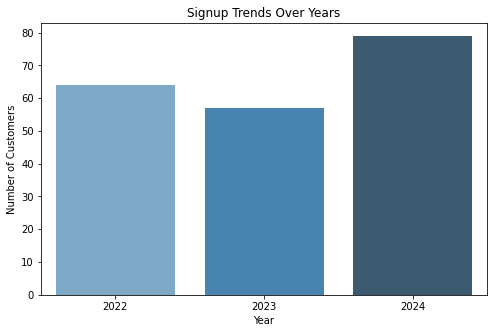

In [12]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=signup_trends.index, y=signup_trends.values, palette="Blues_d")
plt.title("Signup Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()

#### 2. Regional distribution:

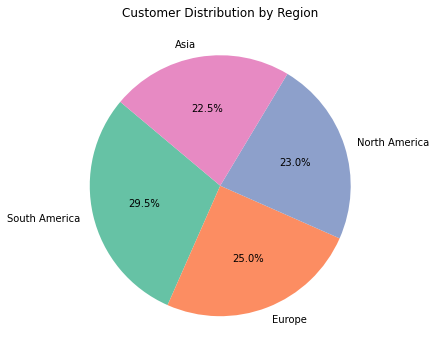

In [13]:
region_distribution = customers['Region'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
region_distribution.plot(kind="pie", autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Customer Distribution by Region")
plt.ylabel("")
plt.show()

### b) Product Analysis
#### 1. Top-selling categories:

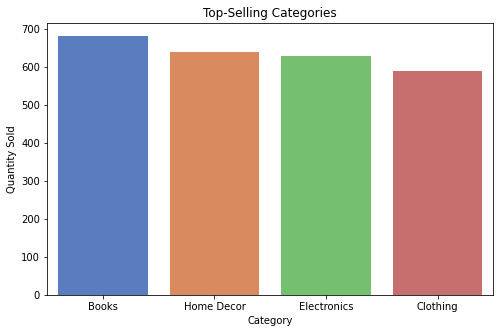

In [14]:
product_sales = transactions.merge(products, on='ProductID', how='inner')
category_sales = product_sales.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="muted")
plt.title("Top-Selling Categories")
plt.xlabel("Category")
plt.ylabel("Quantity Sold")
plt.show()

#### 2. High-revenue products:

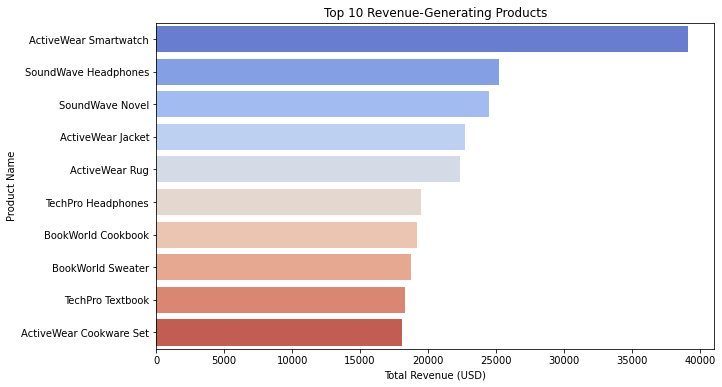

In [15]:
product_sales['TotalRevenue'] = product_sales['Quantity'] * product_sales['Price_x']
top_revenue_products = product_sales.groupby('ProductName')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette="coolwarm")
plt.title("Top 10 Revenue-Generating Products")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

### c) Transaction Analysis
#### 1. Monthly sales trends:

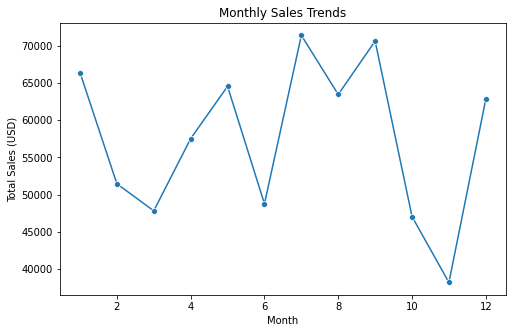

In [16]:
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.show()

#### 2. Average customer spending:

In [17]:
avg_spending = transactions.groupby('CustomerID')['TotalValue'].sum().mean()
print(f"The average customer spending is ${avg_spending:.2f}")

The average customer spending is $3467.31
